# Advance ML Assignment on Product Review Sentiment Analysis 

# by Ashad Amjad

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import math

warnings.filterwarnings('ignore')


from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [2]:
#loading data 

df=pd.read_csv("amazon_baby.csv")

In [3]:
#reading the data

df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [4]:
# checking for null
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [3]:
# replacing nan with nothing

df=df.fillna('nothing')

In [6]:
# checking for null after replacement

df.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [4]:
# defining function to remove punctuations

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [8]:
# checking data types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183531 non-null  object
 1   review  183531 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
# changing data type of review to string

df['review'] = df['review'].astype(str) 

In [6]:
# creating a corpus to store clean text

corpus=[]
for i in df['review']:
    review=i.lower()
    review=remove_punctuation(review)
    corpus.append(review)
    
    
    

In [7]:
# creating new columns in the data frame

df['review_clean']=corpus

In [9]:
df.head()

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,these flannel wipes are ok but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,this is a product well worth the purchase i h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,all of my kids have cried nonstop when i tried...


In [8]:
# creating new data frame by removing rating 3,which is neutral review
df_rated=df[df['rating'] != 3]

In [11]:
df_rated.head()

,name,review,rating,review_clean
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,this is a product well worth the purchase i h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,all of my kids have cried nonstop when i tried...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,when the binky fairy came to our house we didn...


In [9]:
# creating a new attributes having sentiments of the review based on rating

df_rated.loc[df_rated['rating'] >3,"sentiment"]="Positive"
df_rated.loc[df_rated['rating'] <3,"sentiment"]="Negative"

In [16]:
df_rated.sentiment.value_counts()

Positive    140259
Negative     26493
Name: sentiment, dtype: int64

In [10]:
# creating label for Positive sentiment to +1 and negative sentiment to -1

df_rated.loc[df_rated['rating'] >3,"label"]=+1
df_rated.loc[df_rated['rating'] <3,"label"]=-1

In [14]:
# showing count

df_rated.label.value_counts()

 1.0    140259
-1.0     26493
Name: label, dtype: int64

In [68]:
df_rated.shape

(166752, 6)

# Splitting The Data

In [11]:
# Re-sampling the data by creating new data frame

df_model=df_rated.sample(frac=1).reset_index().drop(['index',"name","review","sentiment"],1)

In [16]:
df_model.head()

,rating,review_clean,label
0,5,received exactly what i ordered i wish you cou...,1.0
1,2,within a day of attaching these my 9moold had ...,-1.0
2,1,do not buy these for breast milk storage they ...,-1.0
3,1,do not buy this travel system because the stra...,-1.0
4,1,i bought this before my baby was born i tried ...,-1.0


# removing stopwords from the review clean

df_model["review_clean"]=[ps.stem(word) for word in df_model["review_clean"] if not word in stopwords.words('english')]  

In [12]:
# initialising split parameter

s_f=0.8
n_train = math.floor(s_f * df_model.shape[0])
n_test = math.ceil((1-s_f) * df_model.shape[0])

In [13]:
#pull train and test data from products data using the index docs
train_data = df_model.iloc[:n_train]
test_data = df_model.iloc[n_train:]

In [24]:
print(len(train_data))
print(len(test_data))

133401
33351


In [74]:
train_data.head()

,rating,review_clean,label
0,5,when looking for a sleep machine there were a ...,1.0
1,5,our daughter loves her froggy potty and she lo...,1.0
2,1,i have bought many of these in the past from o...,-1.0
3,5,we havent had any leaks with this wool cover i...,1.0
4,5,the pump works great just what i expected it ...,1.0


In [25]:
test_data.head()

,rating,review_clean,label
133401,5,i love this product and highly recommend it to...,1.0
133402,5,i purchased this item for my new grand daughte...,1.0
133403,1,i took this on a trip so i wouldnt have to was...,-1.0
133404,4,i am pregnant with 3 and i just took this out ...,1.0
133405,5,weve been using britax for our boy now 14 mont...,1.0


In [14]:
# initialising CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(token_pattern=r'\b\w+\b')


In [15]:
# creating new variable by tokenizing train data review_clean column 
train_matrix=cv.fit_transform(train_data.review_clean)


In [16]:
# creating new variable by tokenizing test_data review_clean column 
test_matrix=cv.transform(test_data.review_clean)

In [17]:
# printing the shape of newly created variable above

print(train_matrix.shape)
print(test_matrix.shape)

(133401, 121801)
(33351, 121801)


In [18]:
#dividing data into dependent and independant variable

X_train=train_matrix.copy()
y_train=train_data["label"].copy()
X_test=test_matrix.copy()
y_test=test_data["label"].copy()

In [24]:
X_train.shape

(133401, 121497)

In [19]:
# importing and initialising Logistic regression for model training

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [20]:
# Fitting the train and test data into model and makiing predictions

lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [21]:
#importing all the required libraries for model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
# checking accuracy score

accuracy_score(y_test,y_pred)

0.9308566459776318

In [23]:
# saving confusion matrix into a variable

cm=confusion_matrix(y_test,y_pred)


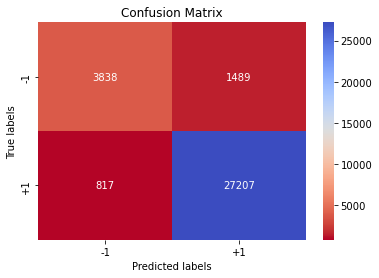

In [24]:
# plotting heatmap for confusion matrix

ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='coolwarm_r', fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['-1', '+1']); ax.yaxis.set_ticklabels(['-1', '+1']);

In [25]:
# printing classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.82      0.72      0.77      5327
         1.0       0.95      0.97      0.96     28024

    accuracy                           0.93     33351
   macro avg       0.89      0.85      0.86     33351
weighted avg       0.93      0.93      0.93     33351



# Base line Majority

In [26]:
# Finding baseline

baseline = len(test_data[test_data['label'] == 1])/len(test_data)
print ("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.8402746544331504


In [27]:
# Printing confusion matrix


#### 
print (' target_label | predicted_label | count ')
print ('--------------+-----------------+-------')
for i, target_label in enumerate(lr.classes_):
    for j, predicted_label in enumerate(lr.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cm[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
    -1.0      |      -1.0       |  3838
    -1.0      |       1.0       |  1489
     1.0      |      -1.0       |   817
     1.0      |       1.0       | 27207


## Computing the cost of mistakes

Suppose you know the costs involved in each kind of mistake:

1. $100 for each false positive.

2. $1 for each false negative.

Correctly classified reviews incur no cost.

**Quiz Question: Given the stipulation, what is the cost associated with the logistic regression classifier's performance on the test set?**

In [28]:
# calculating cost

cost_fp=cm[1,0]*100
cost_fn=cm[0,1]*100
Total_cost=cost_fp+cost_fn
print(f'The Total cost associated with the logistic regression classifiers performance on the test set is: {Total_cost}')

The Total cost associated with the logistic regression classifiers performance on the test set is: 230600


## Precision and Recall

You may not have exact dollar amounts for each kind of mistake. Instead, you may simply prefer to reduce the percentage of false positives to be less than, say, 3.5% of all positive predictions. This is where **precision** comes in:

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

#### To do

First, let us compute the precision of the logistic regression classifier on the test_data. Scikit-learn provides a predefined method for computing precision. (Consult appropriate manuals if you are using other tools.)

In [29]:
# Finding precision score of the model

precision=precision_score(y_test,y_pred)
print(f'precision is :{round(precision,2)}')

precision is :0.95


**Quiz Question:** Out of all reviews in the test set that are predicted to be positive, what fraction of them are false positives? (Round to the second decimal place e.g. 0.25)



In [35]:
## Your Code

# Ans of above question


Fraction_fp=cm[1,0]/(cm[1,0]+cm[1,1])
print(f'The fraction of false positives is: {round(Fraction_fp,2)}')

The fraction of false positives is: 0.03


A complementary metric is **recall**, which measures the ratio between the number of true positives and that of (ground-truth) positive reviews:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

#### To do 
Let us compute the recall on the **test_data**.

**Recall**

In [36]:
# Finding Recall value

Recall=recall_score(y_test,y_pred)
print(f'Recall is :{round(Recall,2)}')

Recall is :0.97


**Quiz Question**: What fraction of the positive reviews in the **test_set** were correctly predicted as positive by the classifier?



In [37]:
# Ans of above question

Fraction_Pr=cm[1,1]/(cm[1,0]+cm[1,1])
print(f'The fraction of the positive reviews in the test_set\n were correctly predicted as positive by the classifier is: {round(Fraction_Pr,2)}')

The fraction of the positive reviews in the test_set
 were correctly predicted as positive by the classifier is: 0.97


**Quiz Question**: What is the recall value for a classifier that predicts **+1** for all data points in the **test_data**?

In [38]:
# Ans of above question

Recall_pos1=cm[1,1]/(cm[1,1]+cm[1,0])
print(f'The recall value for a classifier that predicts +1\n for all data points in the test_datal is :{round(Recall_pos1,2)}')

The recall value for a classifier that predicts +1
 for all data points in the test_datal is :0.97


# Precision-recall tradeoff

In this part, we will explore the trade-off between precision and recall discussed in the lecture.  We first examine what happens when we use a different threshold value for making class predictions.  We then explore a range of threshold values and plot the associated precision-recall curve.  



## Varying the threshold

False positives are costly in our example, so we may want to be more conservative about making positive predictions. To achieve this, instead of thresholding class probabilities at 0.5, we can choose a higher threshold. 

#### To do
Write a function called `apply_threshold` that accepts two things
* `probabilities` (an SArray of probability values)
* `threshold` (a float between 0 and 1).


The function should return an SArray, where each element is set to +1 or -1 depending whether the corresponding probability exceeds `threshold`.

In [42]:
# storing probablities of postive review

probabilities = lr.predict_proba(test_matrix)[:,1]
probabilities

array([9.00598322e-01, 9.99516998e-01, 7.47310031e-04, ...,
       3.95770708e-01, 9.97050530e-01, 6.71749335e-01])

In [43]:
# Defining a function to store classes based of threshold probablities

def apply_threshold(probabilities, threshold):
    
    ## YOUR CODE
    elements=[]
    elements.append(np.where(probabilities>=threshold,1,-1))
    # +1 if >= threshold and -1 otherwise.
    
    return np.array(elements)

Using the model you trained, compute the class probability values P(y=+1|x,w) for the data points in the test_data. Then use thresholds set at 0.5 (default) and 0.9 to make predictions from these probability values.m

In [44]:
probabilities = lr.predict_proba(test_matrix)[:,1]
probabilities

array([9.00598322e-01, 9.99516998e-01, 7.47310031e-04, ...,
       3.95770708e-01, 9.97050530e-01, 6.71749335e-01])

In [33]:
# Ans of above question

predictions_with_default_threshold = apply_threshold(probabilities, 0.5)
print ('Number of positive predicted reviews (threshold = 0.5)',(predictions_with_default_threshold == 1).sum())


Number of positive predicted reviews (threshold = 0.5) 28696


In [34]:
# Ans of above question

recall_default = recall_score(y_test,predictions_with_default_threshold.reshape(-1,1))

recall_default

0.9708464173565515

#### To do 

Calculate positive predicted reviews using 0.9 threshold

In [57]:
# Ans of above question

predictions_with_threshold = apply_threshold(probabilities, 0.9)
print ('Number of positive predicted reviews (threshold = 0.9)',(predictions_with_threshold == 1).sum())

Number of positive predicted reviews (threshold = 0.9) 24434


**Quiz question:** What happens to the number of positive predicted reviews as the threshold increased from 0.5 to 0.9?

**Ans:**--The number of positive predicted reviews got reduced from 28644 to 24434

## Exploring the associated precision and recall as the threshold varies

By changing the probability threshold, it is possible to influence precision and recall. We can explore this as follows:
    
Now, we will explore various different values of tresholds, compute the precision and recall scores, and then plot the precision-recall curve. Use 100 equally spaced values between 0.5 and 1. In Python, we run

In [35]:
# Assiging threshold values

threshold_values = np.linspace(0.5, 1, num=100)
print (threshold_values)

[0.5        0.50505051 0.51010101 0.51515152 0.52020202 0.52525253
 0.53030303 0.53535354 0.54040404 0.54545455 0.55050505 0.55555556
 0.56060606 0.56565657 0.57070707 0.57575758 0.58080808 0.58585859
 0.59090909 0.5959596  0.6010101  0.60606061 0.61111111 0.61616162
 0.62121212 0.62626263 0.63131313 0.63636364 0.64141414 0.64646465
 0.65151515 0.65656566 0.66161616 0.66666667 0.67171717 0.67676768
 0.68181818 0.68686869 0.69191919 0.6969697  0.7020202  0.70707071
 0.71212121 0.71717172 0.72222222 0.72727273 0.73232323 0.73737374
 0.74242424 0.74747475 0.75252525 0.75757576 0.76262626 0.76767677
 0.77272727 0.77777778 0.78282828 0.78787879 0.79292929 0.7979798
 0.8030303  0.80808081 0.81313131 0.81818182 0.82323232 0.82828283
 0.83333333 0.83838384 0.84343434 0.84848485 0.85353535 0.85858586
 0.86363636 0.86868687 0.87373737 0.87878788 0.88383838 0.88888889
 0.89393939 0.8989899  0.9040404  0.90909091 0.91414141 0.91919192
 0.92424242 0.92929293 0.93434343 0.93939394 0.94444444 0.94949

For each of the values of threshold, we first obtain class predictions using that threshold and then compute the precision and recall scores. Save the precision scores and recall scores to lists precision_all and recall_all, respectively.

In [36]:
# Creating empty variable to store precision,recall for each value of threshold

precision_all = []
recall_all = []

probabilities = lr.predict_proba(test_matrix)[:,1]
print(probabilities)

[9.00598322e-01 9.99516998e-01 7.47310031e-04 ... 3.95770708e-01
 9.97050530e-01 6.71749335e-01]


#### To do

Write Code to -

1. Generate predictions using different thresholds
2. calculate precision score and add it to the list precision_all
3. calculate recall score and add it to the list recall_all

In [37]:
## Your Code

# Finding precision,recall for each value of threshold
 
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    precision_all.append(precision_score(y_test,predictions.reshape(-1,1)))
    recall_all.append(recall_score(y_test,predictions.reshape(-1,1)))
    
    
    


In [38]:
# creating a new data frame to store all precision,recall value with its threshold values 

dataset = pd.DataFrame({'threshold_values': threshold_values, 'precision_all': precision_all,'recall_all': recall_all}, columns=['threshold_values', 'precision_all','recall_all'])

In [39]:
dataset.head()

,threshold_values,precision_all,recall_all
0,0.500000,0.948111,0.970846
1,0.505051,0.948385,0.970383
2,0.510101,0.948932,0.970061
3,0.515152,0.949216,0.969776
4,0.520202,0.949465,0.969455


In [40]:
# Defining Function to plat a graph of precision vs recall

%matplotlib inline
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

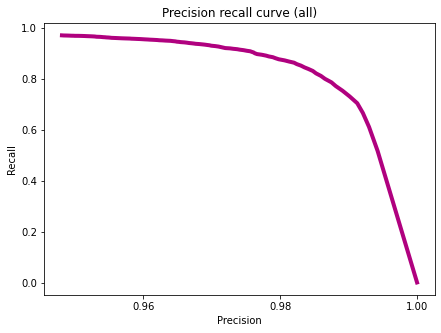

In [41]:
# Plotting graph for precision vs recall

plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

**Conclusion:** From above it can be seen precision & recall are inversely proportional to each other

**Quiz Question:** Using threshold = 0.98, how many false negatives do we get on the test_data? This is the number of false negatives (i.e the number of reviews to look at when not needed) that we have to deal with using this classifier.

In [45]:
# Answering Above Question

predictions_with_threshold_0_98 = apply_threshold(probabilities, 0.98)
cm1=confusion_matrix(y_test,predictions_with_threshold_0_98.reshape(-1,1))

In [46]:
## Your Code

  

print (' target_label | predicted_label | count ')
print ('--------------+-----------------+-------')
for i, target_label in enumerate(lr.classes_):
    for j, predicted_label in enumerate(lr.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cm1[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
    -1.0      |      -1.0       |  5153
    -1.0      |       1.0       |   174
     1.0      |      -1.0       |  8325
     1.0      |       1.0       | 19699


# Evaluating specific search terms

So far, we looked at the number of false positives for the entire test set. In this section, let's select reviews using a specific search term and optimize the precision on these reviews only. After all, a manufacturer would be interested in tuning the false positive rate just for their products (the reviews they want to read) rather than that of the entire set of products on Amazon.

# Precision-Recall on all baby related items
From the test set, select all the reviews for all products with the word 'baby' in them.

In [48]:
# creating a new data frame based on above condition

df_baby=df_rated.sample(frac=1).reset_index().drop(['index',"review","sentiment"],1)

In [49]:
# creating test from above newly created data frame 

test_data = df_baby.iloc[n_train:]

In [50]:
# Text Preprocessing

corpus=[]
for i in test_data['name']:
    review=i.lower()
    review=remove_punctuation(review)
    corpus.append(review)

In [51]:
# replacing name column with clean texts

test_data['name']=corpus

In [52]:
test_data.head()

,name,rating,review_clean,label
133401,simple wishes handsfree breastpump bra pink xsl,5,great product i purchased the medela pump in s...,1.0
133402,boon caterpillar snack stack container greenwh...,2,the container 34doors34 do not stay closed ver...,-1.0
133403,nuk gerber graduates pack of 4 advance insulat...,5,i had to get rid of the nuk silicone sippy cup...,1.0
133404,fisherprice 49 mhz sounds n lights monitor,1,this monitor is terrible i was not sure if i ...,-1.0
133405,skip hop dunks stacking bath toy blue green ye...,5,i got these for my son for xmas when he was al...,1.0


In [53]:
# creating new data frame having "Baby" word in name column

baby_reviews = test_data[test_data['name'].astype(str).apply(lambda x: 'baby' in x.lower())]

In [54]:
baby_reviews.head()

,name,rating,review_clean,label
133406,summer infant mothers touch deluxe baby bather...,4,use this for every bath the height adjuster is...,1.0
133409,evenflo portable babysuite 300 marianna,5,i love this one a friend of ours had given us ...,1.0
133416,levana safe nsee digital video baby monitor wi...,4,picture is clear but can be better compared to...,1.0
133433,uppababy gluxe stroller jakeblack,1,nothing,-1.0
133448,mobicam audio video baby monitoring system,1,we liked this monitor at first the picture is ...,-1.0


Now, let's predict the probability of classifying these reviews as positive. 

Make sure to convert the column review_clean of baby_reviews into a 2D array before computing class probability values. 

In scikit-learn, this task would be implemented as follows:

In [55]:
# Finding probablities of postive class

baby_matrix = cv.transform(baby_reviews['review_clean'])
probabilities_baby = lr.predict_proba(baby_matrix)[:,1]

In [174]:
baby_matrix

<6512x121497 sparse matrix of type '<class 'numpy.int64'>'
	with 367062 stored elements in Compressed Sparse Row format>

In [56]:
# creating test data for this new data frame

y_test_baby=baby_reviews.label.values

Let's plot the precision-recall curve for the baby_reviews dataset. We again use 100 equally spaced values between 0.5 and 1 for the threshold.

In [57]:
# Assigning threshold values

threshold_values = np.linspace(0.5, 1, num=100)

In [58]:
# Finding precision and recall value for all the values of threshold for above newly created test data


baby_precision_all = []
baby_recall_all = []


for threshold in threshold_values:
    predictions = apply_threshold(probabilities_baby, threshold)
    baby_precision_all.append(precision_score(y_test_baby,predictions.reshape(-1,1)))
    baby_recall_all.append(recall_score(y_test_baby,predictions.reshape(-1,1)))

In [59]:
# creating the new data frame to store above calculated data

dataset_baby = pd.DataFrame({'threshold_values': threshold_values, 'precision_all': baby_precision_all,'recall_all': baby_recall_all}, columns=['threshold_values', 'precision_all','recall_all'])
dataset_baby

,threshold_values,precision_all,recall_all
0,0.500000,0.955584,0.975712
1,0.505051,0.956287,0.975522
2,0.510101,0.956821,0.975522
3,0.515152,0.956991,0.975332
4,0.520202,0.957704,0.975332
...,...,...,...
95,0.979798,0.995436,0.703605
96,0.984848,0.995695,0.658254
97,0.989899,0.995324,0.605882
98,0.994949,0.997048,0.512713


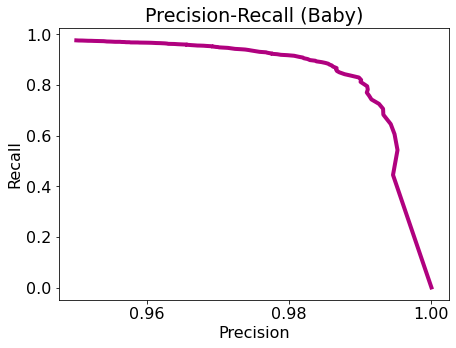

In [189]:
# Plotting graph for precision vs recall value of baby dataset

plot_pr_curve(baby_precision_all, baby_recall_all, "Precision-Recall (Baby)")

**Quiz Question**: Among all the threshold values tried, what is the **smallest** threshold value that achieves a precision of 96.5% or better for the reviews of data in **baby_reviews**? Round your answer to 3 decimal places.

In [71]:
# Answering above question

df_small=dataset_baby.loc[dataset_baby["precision_all"]>0.965].reset_index()
round(df_small.nsmallest(1,"threshold_values"),3)

,index,threshold_values,precision_all,recall_all
0,20,0.601,0.966,0.967
